In [1]:
import cv2
from facepp import API, File
import pandas as pd
import time
import json
from pandas.io.json import json_normalize
import wget

from pandas import compat
from findtools.find_files import (find_files, Match)
import codecs
from pandas import compat
import ast, json
from pandas import DataFrame
import yaml
import numpy as np
from __future__ import division
import simplejson
import tmpFB
from skimage import io
import matplotlib.pyplot as plt
import pymongo
import requests
from lxml import html
from lxml import etree


In [18]:
club = 'opiumbarcelona'
tmpFB.getPicUrls(club, False)

Traceback (most recent call last):
  File "/Users/dev/anaconda/lib/python2.7/site-packages/IPython/core/ultratb.py", line 970, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/Users/dev/anaconda/lib/python2.7/site-packages/IPython/core/ultratb.py", line 233, in wrapped
    return f(*args, **kwargs)
  File "/Users/dev/anaconda/lib/python2.7/site-packages/IPython/core/ultratb.py", line 267, in _fixed_getinnerframes
    records = fix_frame_records_filenames(inspect.getinnerframes(etb, context))
  File "/Users/dev/anaconda/lib/python2.7/inspect.py", line 1044, in getinnerframes
    framelist.append((tb.tb_frame,) + getframeinfo(tb, context))


ERROR: Internal Python error in the inspect module.
Below is the traceback from this internal error.



  File "/Users/dev/anaconda/lib/python2.7/inspect.py", line 1004, in getframeinfo
    filename = getsourcefile(frame) or getfile(frame)
  File "/Users/dev/anaconda/lib/python2.7/inspect.py", line 454, in getsourcefile
    if hasattr(getmodule(object, filename), '__loader__'):
  File "/Users/dev/anaconda/lib/python2.7/inspect.py", line 491, in getmodule
    if ismodule(module) and hasattr(module, '__file__'):
KeyboardInterrupt



Unfortunately, your original traceback can not be constructed.



TypeError: 'NoneType' object is not iterable

In [2]:
conn = pymongo.MongoClient()
db = conn.faces
collection = db.metaFace
collection2 = db.metaFace2

In [3]:
api = API('b40d3ea28aad1f2c2aa939dec674abff', '_gYS77zBAL0U60gtv_qebqwRmRWJz4c1')
faceCascade = cv2.CascadeClassifier('/Users/dev01/Documents/Docs/haarcascade_frontalface_default.xml')

noFaces = []
def get_face_meta_url(found_files, api, club):

   
    facesMeta = pd.DataFrame()
    facesMetaList = []
    noFaces = []

    for idx, imgpath in enumerate(found_files): 
        
       
        wget.download(imgpath, out='./temp' )
        try:
            print(imgpath)
            result = api.detection.detect(url = imgpath,  attribute="pose,age,gender,race,smiling")
            r_dump = json.dumps(result)
            result2=yaml.safe_load(r_dump)
            if idx % 100 == 0:
                print('still going')
            print(len(result['face']))    
            if len(result['face']) > 0:
                for face in result['face']:
                    tempDict = face
                    tempDict['img_url'] = imgpath
                    tempDict['img_width'] = result['img_width']
                    tempDict['img_height'] = result['img_height']
                    facesMetaList.append(tempDict)
                    temp = json_normalize(tempDict)
                    collection.insert(tempDict)
                    facesMeta = pd.concat([facesMeta, temp], axis=0, ignore_index = True)
            if len(result['face']) == 0:
                noFaces.append(imgpath)
        except:
            print ('failed' + imgpath)
        
    facesMeta.to_pickle("./data/facesMeta" + club + "_" + time.strftime("%Y%m%d")  + ".pkl")

    return(facesMeta, facesMetaList)
    

http://api.us.faceplusplus.com/


In [4]:
import time
import codecs
import ast
import getMetaFace
start_time = time.time()

t=open('../../UrlList_opiumbarcelona.txt','r')
listOfUrls =  ast.literal_eval(t.read())[0:10000]
listOfImageUrls = []
for idx, url in enumerate(listOfUrls):
    r = requests.get(url)
    tree = html.fromstring(r.text)

    for htmlObject in tree.xpath("//img[@class='fbPhotoImage img']"): 
        urlOfImage = htmlObject.attrib['src']
        listOfImageUrls.append(urlOfImage)
        if idx % 100 == 0:
            print 'still going' + urlOfImage

print("--- %s seconds ---" % (time.time() - start_time))

http://api.us.faceplusplus.com/
still goinghttps://scontent-mad1-1.xx.fbcdn.net/hphotos-xat1/v/t1.0-9/s720x720/12042722_968151706579311_5830683328690689007_n.jpg?oh=8417aa47b42737b6a8a1fa2cdb52ccf6&oe=56A9B7F4
still goinghttps://scontent-mad1-1.xx.fbcdn.net/hphotos-xpt1/v/t1.0-9/s720x720/12004907_968151379912677_5819547625305383541_n.jpg?oh=8ab9365753125d9bade307771f8650ba&oe=56957A3B
still goinghttps://scontent-mad1-1.xx.fbcdn.net/hphotos-xlf1/v/t1.0-0/p480x480/11990463_967219703339178_3123092575953860997_n.jpg?oh=510abbf68bdee7ff6d742236f0a49672&oe=568EA4EB
still goinghttps://scontent-mad1-1.xx.fbcdn.net/hphotos-xta1/v/t1.0-9/s720x720/12036392_967678266626655_2015523462130280618_n.jpg?oh=5dbed6b3bba51fbea912b786b699c2c6&oe=568A755F
still goinghttps://scontent-mad1-1.xx.fbcdn.net/hphotos-xat1/v/t1.0-9/s720x720/12042722_968151706579311_5830683328690689007_n.jpg?oh=8417aa47b42737b6a8a1fa2cdb52ccf6&oe=56A9B7F4
still goinghttps://scontent-mad1-1.xx.fbcdn.net/hphotos-xpf1/v/t1.0-9/s720x720

In [118]:
found_files = listOfImageUrls

In [120]:
facesMeta = pd.DataFrame()
facesMetaList = []
noFaces = []
failedLinks = []

for idx, imgpath in enumerate(found_files): 
    imgpath = imgpath.encode('ascii','ignore')
    wget.download(imgpath, out='./temp' )
    try:
        result = api.detection.detect(url = imgpath,  attribute="pose,age,gender,race,smiling")
        r_dump = json.dumps(result)
        result2=yaml.safe_load(r_dump)
        if idx % 100 == 0:
            print('still going')
        print(len(result['face']))    
        if len(result['face']) > 0:
            for face in result['face']:
                tempDict = face
                tempDict['img_url'] = imgpath
                tempDict['img_width'] = result['img_width']
                tempDict['img_height'] = result['img_height']
                facesMetaList.append(tempDict)
        if len(result['face']) == 0:
            None         
    except Exception as x:
        print('e')
        if x.code == 432:
            failedLinks.append(imgpath)
        if x.code == 502:
            time.sleep(60)
            print(idx)
       



still going
2
3
4
3
2
8
6
2
2
2
4
2
1
2
2
2
3
4
1
1
4
0
3
4
1
4
2
2
3
4
3
2
8
6
2
2
2
4
2
1
2
2
2
3
4
1
1
4
0
3
4
1
4
2
2
1
0
2
1
1
1
0
2
1
3
4
3
2
3
0
2
5
4
1
1
3
1
0
0
3
6
2
3
7
3
2
2
3
4
3
2
8
6
2
2
2
4
2
1
2
still going
2
2
3
4
1
1
4
0
3
4
1
4
2
2
1
0
2
1
1
1
0
2
1
3
4
3
2
3
0
2
5
4
1
1
3
1
0
0
3
6
2
3
7
3
2
3
2
2
2
2
1
2
2
6
2
2
5
3
3
3
9
2
1
6
2
2
0
5
2
0
3
0
2
2
1
0
1
1
2
1
2
3
1
3
1
1
1
2
2
5
2
3
4
2
1
3
2
2
1
5
still going
3
3
2
2
2
0
0
0
1
2
3
4
3
2
8
6
2
2
2
4
2
1
2
2
2
3
4
1
1
4
0
3
4
1
4
2
2
1
0
2
1
1
1
0
2
1
3
4
3
2
3
0
2
5
4
1
1
3
1
0
0
3
6
2
3
7
3
2
3
2
2
2
2
1
2
2
6
2
2
5
3
3
3
9
2
1
6
2
2
0
5
2
0
3
0
2
2
1
0
1
still going
1
2
1
2
3
1
3
1
1
1
2
2
5
2
3
4
2
1
3
2
2
1
5
3
3
2
2
2
0
0
0
1
0
0
0
0
1
4
0
0
0
1
3
1
5
1
0
0
0
0
5
2
2
6
2
5
3
2
2
1
0
0
5
0
2
1
1
3
2
2
2
1
2
2
2
6
3
3
3
2
4
3
3
5
3
3
4
3
2
4
4
2
2
0
0
3
2
3
4
3
still going
2
8
6
2
2
2
4
2
1
2
2
2
3
4
1
1
4
0
3
4
1
4
2
2
1
0
2
1
1
1
0
2
1
3
4
3
2
3
0
2
5
4
1
1
3
1
0
0
3
6
2
3
7
3
2
3
2
2
2
2
1
2
2
6
2
2
5
3
3
3


In [123]:
facesMetaList[2200]

{u'attribute': {u'age': {u'range': 5, u'value': 12},
  u'gender': {u'confidence': 99.9943, u'value': u'Female'},
  u'pose': {u'pitch_angle': {u'value': -4e-06},
   u'roll_angle': {u'value': 14.2651},
   u'yaw_angle': {u'value': 0.238141}},
  u'race': {u'confidence': 99.9765, u'value': u'White'},
  u'smiling': {u'value': 87.4003}},
 u'face_id': u'eaa13296947ed815ee73a4e43265da61',
 'img_height': 720,
 'img_url': 'https://fbcdn-photos-e-a.akamaihd.net/hphotos-ak-xpf1/v/t1.0-0/p480x480/12003949_968150893246059_6861485920442626028_n.jpg?oh=c178f4ccaafaab8d84d3ed88ab87a796&oe=56A2BB44&__gda__=1453998073_e2dee3f6db0e803b05d03dceee617d4d',
 'img_width': 480,
 u'position': {u'center': {u'x': 45.75, u'y': 21.0},
  u'eye_left': {u'x': 43.2855, u'y': 18.583167},
  u'eye_right': {u'x': 49.671, u'y': 19.6655},
  u'height': 9.0,
  u'mouth_left': {u'x': 41.65875, u'y': 22.755667},
  u'mouth_right': {u'x': 47.3885, u'y': 23.891333},
  u'nose': {u'x': 46.05825, u'y': 22.298},
  u'width': 13.5},
 u'tag'

In [44]:
import time
import codecs
import ast
import getMetaFace
start_time = time.time()

x = codecs.open('./data/imageUrlList_FB2instagram_opiumbarcelona1_143141875746969.txt','r', encoding='utf-8')
x1 = x.read()
found_files = ast.literal_eval(x1)
found_files = [item.encode('ascii','ignore') for item in found_files][0:200]
y = get_face_meta_url(found_files[0:200], api, 'opiumbarcelona')
print(found_files)
print("--- %s seconds ---" % (time.time() - start_time))

https://scontent.cdninstagram.com/hphotos-xaf1/t51.2885-15/s640x640/sh0.08/e35/11881878_1498393017147001_881686938_n.jpg
still going
1
https://scontent.cdninstagram.com/hphotos-xaf1/t51.2885-15/s640x640/sh0.08/e35/11875371_1033292933379422_1784978011_n.jpg
0
https://scontent.cdninstagram.com/hphotos-xaf1/t51.2885-15/e15/11821275_889570074455568_1683135147_n.jpg
0
https://scontent.cdninstagram.com/hphotos-xaf1/t51.2885-15/s640x640/sh0.08/e35/11906337_1636405696609966_2140883206_n.jpg
3
https://scontent.cdninstagram.com/hphotos-xfa1/t51.2885-15/s640x640/sh0.08/e35/11849252_410009355851486_1240370951_n.jpg
1
https://scontent.cdninstagram.com/hphotos-xfa1/t51.2885-15/s640x640/sh0.08/e35/11910476_159092277765477_1385619302_n.jpg
1
https://scontent.cdninstagram.com/hphotos-xfa1/t51.2885-15/s640x640/sh0.08/e35/11950586_993645210699673_95893220_n.jpg
2
https://scontent.cdninstagram.com/hphotos-xaf1/t51.2885-15/e15/11917785_1190726787609790_1310988424_n.jpg
failedhttps://scontent.cdninstagram.c

In [ ]:
y['']

In [16]:
collection.find_one()

{u'_id': ObjectId('5602bf55aea396183acbac03'),
 u'attribute': {u'age': {u'range': 5, u'value': 10},
  u'gender': {u'confidence': 97.9971, u'value': u'Female'},
  u'pose': {u'pitch_angle': {u'value': -0.006413},
   u'roll_angle': {u'value': -17.1207},
   u'yaw_angle': {u'value': 21.910513}},
  u'race': {u'confidence': 84.6674, u'value': u'White'},
  u'smiling': {u'value': 22.0977}},
 u'face_id': u'1ec2b7155a18a71ee2701912fbcdc1a7',
 u'img_height': 640,
 u'img_width': 640,
 u'position': {u'center': {u'x': 40.166667, u'y': 40.666667},
  u'eye_left': {u'x': 38.461, u'y': 39.771333},
  u'eye_right': {u'x': 41.383833, u'y': 38.871},
  u'height': 6.333333,
  u'mouth_left': {u'x': 39.7495, u'y': 42.467167},
  u'mouth_right': {u'x': 41.5355, u'y': 41.9325},
  u'nose': {u'x': 40.645333, u'y': 41.418833},
  u'width': 6.333333},
 u'tag': u'',
 u'url': u'https://scontent.cdninstagram.com/hphotos-xaf1/t51.2885-15/s640x640/sh0.08/e35/11881878_1498393017147001_881686938_n.jpg'}

In [40]:
json_normalize(collection.find_one())

,_id,attribute.age.range,attribute.age.value,attribute.gender.confidence,attribute.gender.value,attribute.pose.pitch_angle.value,attribute.pose.roll_angle.value,attribute.pose.yaw_angle.value,attribute.race.confidence,attribute.race.value,...,position.height,position.mouth_left.x,position.mouth_left.y,position.mouth_right.x,position.mouth_right.y,position.nose.x,position.nose.y,position.width,tag,url
0,5602bf55aea396183acbac03,5,10,97.9971,Female,-0.006413,-17.1207,21.910513,84.6674,White,...,6.333333,39.7495,42.467167,41.5355,41.9325,40.645333,41.418833,6.333333,,https://scontent.cdninstagram.com/hphotos-xaf1...


       attribute.age.range  attribute.age.value  attribute.gender.confidence  \
count           289.000000           289.000000                   289.000000   
mean              6.685121            27.875433                    94.450572   
std               1.938594             9.747421                    11.628860   
min               5.000000             5.000000                    51.001500   
25%               5.000000            21.000000                    96.230900   
50%               6.000000            28.000000                    99.888500   
75%               8.000000            34.000000                    99.993700   
max              12.000000            61.000000                    99.999900   

       attribute.pose.pitch_angle.value  attribute.pose.roll_angle.value  \
count                        289.000000                       289.000000   
mean                          -0.027611                         2.833858   
std                            3.122799            

(array([ 11.,  22.,  40.,  66.,  60.,  60.,  14.,   8.,   5.,   3.]),
 array([  5. ,  10.6,  16.2,  21.8,  27.4,  33. ,  38.6,  44.2,  49.8,
         55.4,  61. ]),
 <a list of 10 Patch objects>)

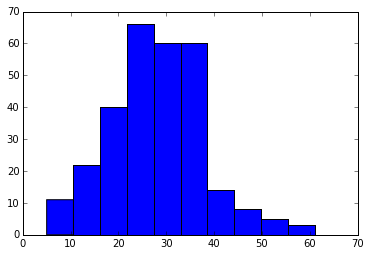

In [84]:
%matplotlib inline
import matplotlib
print(y[0].describe())
print(y[0].columns)
#counts by gender and race
pd.crosstab(y[0]['attribute.gender.value'],y[0]['attribute.race.value'])
#unique urls
len(pd.unique(y[0]['url'])) 
plt.hist(y[0]['attribute.age.value'])

In [3]:
import json 
import time
import requests
import urllib, urllib2
from lxml import html
from lxml import etree
import locale
import random

def getFBtoInstagramUrls(fbPageName):
    #Get FB place id
    url = 'https://www.facebook.com/' + fbPageName
    r = requests.get(url)
    facebookID = r.text.split('"pageID":"')[1].split('"')[0]

    instagramAPIUrl = 'https://api.instagram.com/v1/locations/search?facebook_places_id={0}&client_id=1b724eef0ecc4bd58e63cab65576bec5'

    url = instagramAPIUrl.format(facebookID)
    r = requests.get(url)
    data = json.loads(r.text)
    instagramID = data['data'][0]['id']
    instagramMediaUrl = 'https://api.instagram.com/v1/locations/{0}/media/recent?client_id=1b724eef0ecc4bd58e63cab65576bec5'
    
    url = instagramMediaUrl.format(instagramID)

    r = requests.get(url)
    data = json.loads(r.text)
    print(json.dumps(data))

getFBtoInstagramUrls('opiumbarcelona')

{"pagination": {"next_url": "https://api.instagram.com/v1/locations/1176637/media/recent?max_id=1075863708624140216&client_id=1b724eef0ecc4bd58e63cab65576bec5", "next_max_id": "1075863708624140216"}, "meta": {"code": 200}, "data": [{"attribution": null, "tags": ["style", "lamborghini", "nightout", "opiumbarcelona", "fashion", "redcarpet", "lamborghinidoors", "rental", "spain"], "user": {"username": "mr.juicy_jamie", "profile_picture": "https://igcdn-photos-e-a.akamaihd.net/hphotos-ak-xpa1/t51.2885-19/1742110_1616231481978140_553020968_a.jpg", "id": "1449605930", "full_name": "Jamie Bellucco"}, "comments": {"count": 0, "data": []}, "filter": "Hefe", "images": {"low_resolution": {"url": "https://scontent.cdninstagram.com/hphotos-xaf1/t51.2885-15/s320x320/e35/11881878_1498393017147001_881686938_n.jpg", "width": 320, "height": 320}, "thumbnail": {"url": "https://scontent.cdninstagram.com/hphotos-xaf1/t51.2885-15/s150x150/e35/11881878_1498393017147001_881686938_n.jpg", "width": 150, "height

In [104]:

#get_face_meta_url(found_files, api)
imgpath = 'https://scontent-mad1-1.xx.fbcdn.net/hphotos-xtp1/v/t1.0-9/p720x720/12036888_967934779934337_933584483124047997_n.jpg?oh=355ce31c18ebe08d6a754b47e528c2ed&oe=56A0C1D7'
[imgpath*4]

,0
0,https://scontent-mad1-1.xx.fbcdn.net/hphotos-x...


In [ ]:
def distance(df,side1,side2):
    x=((df[side1+'.x'] - df[side2+'.x'])**2 +(df[side1+'.y'] - df[side2+'.y'])**2)**0.5
    return x

def midpoint(df,side1,side2):
    x = (df[side1+'.x'] - df[side2+'.x'])/2.0 + df[side1+'.x'] 
    y = (df[side1+'.y'] - df[side2+'.y'])/2.0 + df[side1+'.y']
    return x , y
    
    
def beauty(df, df2):    
    dfout = pd.DataFrame()  
    dfout['faceId'] = df['face_id']
    dfout['age'] = df2['attribute.age.value']
    dfout['ageRange'] = df2['attribute.age.range']
    dfout['gender'] = df2['attribute.gender.confidence']
    dfout['genderConfidence'] = df2['attribute.gender.value']
    dfout['pitchAngle']  = df2['attribute.pose.pitch_angle.value']
    dfout['rollAngle'] = df2['attribute.pose.roll_angle.value']
    dfout['yawAngle'] = df2['attribute.pose.yaw_angle.value']
    dfout['raceConfidence'] = df2['attribute.race.confidence']
    dfout['race'] = df2['attribute.race.value']
    dfout['innerEyeDist'] = distance(df,'left_eye_right_corner','right_eye_left_corner')
    dfout['pupilDist'] = distance(df,'left_eye_pupil','right_eye_pupil')
    dfout['mouthWidth'] = distance(df,'mouth_right_corner','mouth_left_corner')
    dfout['lowerLipThick'] = distance(df,'mouth_lower_lip_top','mouth_lower_lip_bottom')
    dfout['upperLipThick'] = distance(df,'mouth_upper_lip_top','mouth_upper_lip_bottom')
    dfout['lowerThird'] = distance(df,'mouth_right_corner','mouth_left_corner')
    dfout['noseWidth'] = distance(df, 'nose_right', 'nose_left')
    dfout['eyebrowInnerDist'] = distance(df, left_eyebrow_left_corner )
    df['midpt_pupil.x'] = midpoint(df, 'left_eye_pupil', 'right_eye_pupil')[0]
    df['midpt_pupil.y'] = midpoint(df, 'left_eye_pupil', 'right_eye_pupil')[1]
    dfout['pupilChinDist'] = distance(df, 'midpt_pupil', 'contour_chin')
    dfout['pupilNostrilDist'] = distance(df, 'midpt_pupil', 'nose_contour_lower_middle')
    dfout['pupilCenterLip'] = distance(df, 'midpt_pupil', 'contour_chin')
    dfout['noseTipChinDist'] = distance(df, 'nose_tip', 'contour_chin')
    dfout['nostrilChinDist'] = distance(df, 'nose_contour_lower_middle', 'contour_chin')
    for i in range(1,10):
       df['contourDist'+str(i)] = distance(df, 'contour_left'+str(i), 'contour_right'+str(i))  
    dfout['faceWidth'] = df[['contourDist'+str(i) for i in range(1,10)]].max(axis=1)   
    dfout['ratioPupilDistFaceWidth'] = dfout['pupilDist']/dfout['faceWidth']
    dfout['ratioInnerEyeNoseWidth'] = dfout['innerEyeDist']/dfout['noseWidth']
    dfout['ratioUpperLowerLip'] = dfout['upperLipThick']/dfout['lowerLipThick']
    dfout['ratioPupilDistFaceWidth'] = dfout['pupilDist']/dfout['faceWidth']
    dfout['ratioInnerEyeNoseWidth'] = dfout['innerEyeDist']/dfout['noseWidth']
    dfout['ratioUpperLowerLip'] = dfout['upperLipThick']/dfout['lowerLipThick']
    return dfout
    
allFaces2 = test[0]
metaFaces = test[2]
beauty(allFaces2, metaFaces )